In [23]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

--2021-10-01 15:02:20--  http://handsonml.control.lth.se/data/training_data.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54950 (54K) [text/csv]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>]  53.66K   268KB/s    in 0.2s    

2021-10-01 15:02:21 (268 KB/s) - ‘training_data.csv’ saved [54950/54950]

--2021-10-01 15:02:21--  http://handsonml.control.lth.se/data/songs_to_classify.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14306 (14K) [text/csv]
Saving to: ‘songs_to_classify.csv’

songs_to_classify.c 100%[==========

In [15]:
# Load data
train = pd.read_csv("training_data.csv")
test_classify = pd.read_csv("songs_to_classify.csv")

In [16]:
df = pd.read_csv('training_data.csv')
# select which features to use

X = df.drop(columns=['label'])
y = df.loc[:,'label'].values

features = ['danceability','acousticness', 'instrumentalness', 'energy', 'valence',
            'loudness', 'liveness', 'speechiness', 'tempo', 'duration']
features_cat = ['time_signature', 'key', 'mode']

# Scaling the dataset to ensure more accurate results
from sklearn.preprocessing import StandardScaler
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, features_cat),
    ('standard-scaler', numerical_preprocessor, features)])

In [17]:
clf = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [18]:
# Split into dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf.fit(X_train,np.ravel(y_train))

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['time_signature', 'key',
                                                   'mode']),
                                                 ('standard-scaler',
                                                  StandardScaler(c

In [ ]:
# Calculate accuracy: Evaluate the models using cross-validation
# Make Predictions on Test Data and compare with truth
scores = cross_val_score(clf, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score = clf.score(X_test, np.ravel(y_test))
print('Test score: ', '{0:.4f}'.format(score*100))

81.07 accuracy with a standard deviation of 0.07
Test score:  82.0000


In [ ]:
# # Make Predictions on Test Data and compare with truth
pred = clf.predict(X_test)

In [20]:
# Make Predictions on Test Data and compare with truth
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, pred))

[[40 14]
 [13 83]]


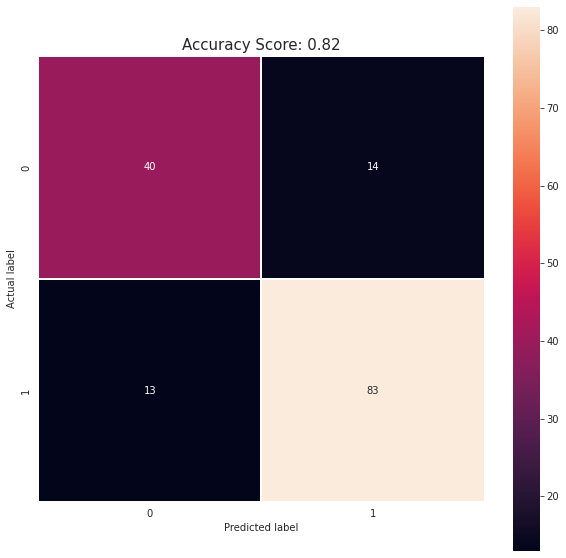

In [21]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

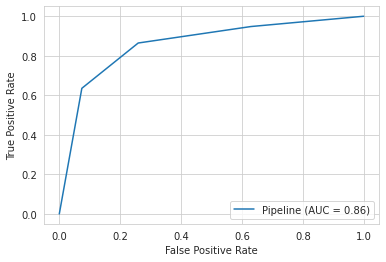

In [22]:
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, y_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75        54
           1       0.86      0.86      0.86        96

    accuracy                           0.82       150
   macro avg       0.81      0.80      0.80       150
weighted avg       0.82      0.82      0.82       150



In [ ]:
final_y = clf.predict(test_classify)

In [ ]:
final =''.join(str(final_y).split(' ,')).replace(" ", "").replace('\n', "")
final

'[10011001001111101011001100000011011111100101010110001101110011101111101011100110111001111010001011110111110111100111111011101110101011111111101011011011001111100100100110111100011011111110100011100111]'

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 8}

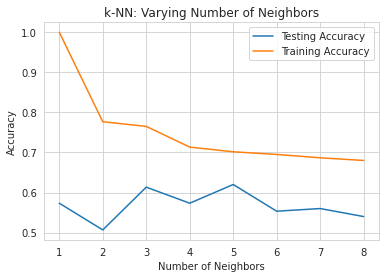

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, np.ravel(y_train))
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, np.ravel(y_train))

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, np.ravel(y_test))

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# It looks like the test accuracy is highest when using 3 neighbors. 
# Using 5 neighbors or more seems to result in a simple model that underfits the data.